In [1]:
import pandas as pd 
import numpy as np 

In [2]:
dataset = pd.read_csv('my_dataset.csv')
dataset

,Unnamed: 0,temp,humd,sm
0,0,23.02,90.57,74.63
1,1,23.47,88.37,75.76
2,2,23.64,85.26,75.76
3,3,23.62,85.93,74.63
4,4,23.82,86.06,74.63
...,...,...,...,...
20161,20161,27.04,32.24,3.27
20162,20162,28.53,28.69,3.27
20163,20163,30.07,24.39,3.27
20164,20164,31.55,22.99,3.27


In [4]:
#Remove the unnamed column from the dataset
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset

,temp,humd,sm
0,23.02,90.57,74.63
1,23.47,88.37,75.76
2,23.64,85.26,75.76
3,23.62,85.93,74.63
4,23.82,86.06,74.63
...,...,...,...
20161,27.04,32.24,3.27
20162,28.53,28.69,3.27
20163,30.07,24.39,3.27
20164,31.55,22.99,3.27


In [5]:
#DATASET SHAPE (ROWS and COLUMNS)
dataset.shape 

(20166, 3)

In [6]:
#DATASET STATISTICS 
dataset.describe() 

,temp,humd,sm
count,20166.000000,20166.000000,20166.000000
mean,22.625972,78.329035,43.390957
std,4.666760,24.007034,30.777339
min,8.610000,13.320000,0.000000
25%,20.000000,61.690000,4.652500
50%,21.430000,88.220000,64.100000
75%,26.110000,100.000000,70.420000
max,36.880000,100.000000,79.370000


In [16]:
#SEPARATING DEPENDENT and INDEPENDENT FEATURES (INPUTS and TARGET)
X = dataset.iloc[:, :-1].values #INDEPENDENT VARIABLES (INPUTS)
y = dataset.iloc[:, -1].values #DEPENDENT VARIABLE (TARGET-MOISTURE LEVEL)

In [42]:
y

array([74.63, 75.76, 75.76, ...,  3.27,  3.27,  3.28])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

# RANDOM FOREST REGRESSOR

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=60, random_state=0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [30]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.277254514704042
Mean Squared Error: 312.42680097681693
Root Mean Squared Error: 17.675599027382834


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,68.49,12.482833
1,4.14,8.790833
2,3.59,3.642843
3,10.53,14.148500
4,4.04,10.226667
...,...,...
4029,4.13,62.203694
4030,4.13,69.250500
4031,71.43,69.400000
4032,67.57,62.830556


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))

Training Accuracy =  0.8808178816084279
Test Accuracy =  0.6697277427156874


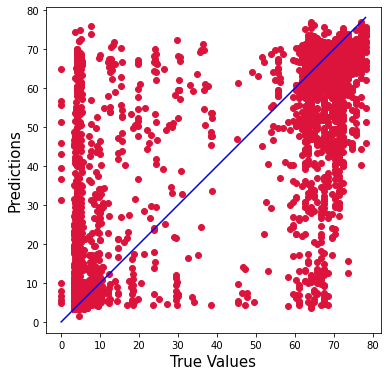

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# LINEAR REGRESOR 

In [34]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

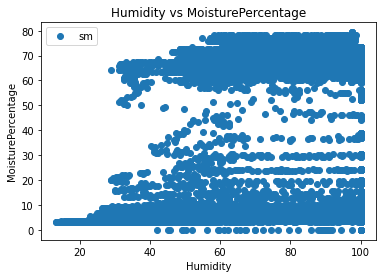

In [36]:
dataset.plot(x='humd', y='sm', style='o')  
plt.title('Humidity vs MoisturePercentage')  
plt.xlabel('Humidity')  
plt.ylabel('MoisturePercentage')  
plt.show()  

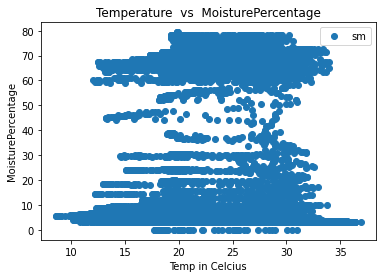

In [37]:
dataset.plot(x='temp', y='sm', style='o')  
plt.title('Temperature  vs  MoisturePercentage')  
plt.xlabel('Temp in Celcius')  
plt.ylabel('MoisturePercentage')  
plt.show()

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,68.49,51.739910
1,4.14,47.341822
2,3.59,37.110882
3,10.53,26.279003
4,4.04,27.331485
...,...,...
4029,4.13,59.820576
4030,4.13,55.638399
4031,71.43,63.072492
4032,67.57,65.246063


In [40]:
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))

Training Accuracy =  0.5716470248792027
Test Accuracy =  0.5625676740823569


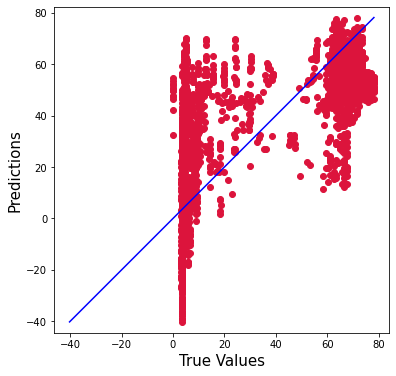

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()